In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 # Convergence in Probability

$X_n \xrightarrow{\mathbb{P}} X$ $\iff$ $\forall$ $\epsilon > 0$,  $\mathbb{P}(|X_n - X|>\epsilon) = p_n$  goes to $0$ as $n$ goes to $\infty$ 

We have: $\hat{p}_M = \frac{1}{M} \sum_{j=1}^M I(|X_n^{j} - X^{j}| >\epsilon)\xrightarrow{\mathbb{P}} p_n$, where $X_n^{j} - X^{j}$ are iid and with same law as  $X_n - X$, hence  $\hat{p}_M$ is unbiased (since $\mathbb{E}(\hat{p}_M) = p_n$) and weakly consistent estimator of $p_n$

We are going to illustrate this when $X$ is deterministic, by seing that $\hat{p}_M$ goes to $0$ as $n$ goes to $\infty$ (in probability). One can show that for a given $M$, $\hat{p}_M \xrightarrow{\mathbb{P}}0$ as $n$ goes to $\infty$)

In [5]:
x = np.random.normal(0,1, (10, 5))
x

array([[ 0.19831091,  0.42184783, -0.74480169, -2.10514165,  0.48882288],
       [-0.08716479,  0.781055  , -0.09936157, -0.4118067 , -1.77859984],
       [-1.05496198, -0.01228649, -0.31783738, -1.4785169 , -0.69714487],
       [ 0.21892616,  0.63725644,  0.49122524,  1.43146524, -0.04623961],
       [-0.11365418, -0.93111846,  0.28896595,  0.69861219, -0.05599097],
       [-1.30818116, -0.05110898, -0.75035146, -0.50093395,  0.72318827],
       [ 0.00978724, -0.10652735,  2.13064667,  0.40872196,  0.37695846],
       [ 1.23369817,  0.99272725,  1.79175383,  0.85322874, -1.49729142],
       [ 0.85179626, -1.11263261, -0.35606925, -1.19841461, -0.52991265],
       [-0.59281349, -0.03129246, -0.62634057, -0.42025654, -0.02620906]])

In [6]:
x.cumsum(0)

array([[ 0.19831091,  0.42184783, -0.74480169, -2.10514165,  0.48882288],
       [ 0.11114612,  1.20290283, -0.84416326, -2.51694834, -1.28977695],
       [-0.94381587,  1.19061634, -1.16200064, -3.99546524, -1.98692183],
       [-0.72488971,  1.82787278, -0.6707754 , -2.564     , -2.03316144],
       [-0.83854389,  0.89675432, -0.38180944, -1.86538781, -2.0891524 ],
       [-2.14672505,  0.84564534, -1.1321609 , -2.36632176, -1.36596413],
       [-2.13693781,  0.73911799,  0.99848577, -1.9575998 , -0.98900568],
       [-0.90323964,  1.73184525,  2.7902396 , -1.10437106, -2.4862971 ],
       [-0.05144338,  0.61921264,  2.43417035, -2.30278566, -3.01620975],
       [-0.64425687,  0.58792018,  1.80782978, -2.7230422 , -3.04241881]])

In [7]:
x.sum(0)

array([-0.64425687,  0.58792018,  1.80782978, -2.7230422 , -3.04241881])

In [8]:
x.sum(0)/10

array([-0.06442569,  0.05879202,  0.18078298, -0.27230422, -0.30424188])

In [10]:
np.diag(1/np.array(list(range(1,10+1))))@x.cumsum(0)

array([[ 0.19831091,  0.42184783, -0.74480169, -2.10514165,  0.48882288],
       [ 0.05557306,  0.60145141, -0.42208163, -1.25847417, -0.64488848],
       [-0.31460529,  0.39687211, -0.38733355, -1.33182175, -0.66230728],
       [-0.18122243,  0.4569682 , -0.16769385, -0.641     , -0.50829036],
       [-0.16770878,  0.17935086, -0.07636189, -0.37307756, -0.41783048],
       [-0.35778751,  0.14094089, -0.18869348, -0.39438696, -0.22766069],
       [-0.30527683,  0.10558828,  0.14264082, -0.27965711, -0.14128653],
       [-0.11290496,  0.21648066,  0.34877995, -0.13804638, -0.31078714],
       [-0.00571593,  0.0688014 ,  0.27046337, -0.25586507, -0.33513442],
       [-0.06442569,  0.05879202,  0.18078298, -0.27230422, -0.30424188]])

In [14]:
((abs(np.diag(1/np.array(list(range(1,10+1))))@x.cumsum(0)) > 10**(-2))*1).sum(1)/5

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 1. ])

In [3]:
def illustration_conv_prob(eps = 10**(-2), n_max = 10000, M = 1000):
    ''' Illustrates the convergence in probability to 0 of the empirical mean of iid standard normal 
     random variables
     
    eps is the precision, n_max is the numer of observations, M the numer of samples 
    '''
    ## The matrix of the realisations of iid standard normal random variables  
    mat_realisations = np.random.normal(0,1, (n_max, M))
    
    ## The matrix of mean realisations(the X_n)
    X_n = np.diag(1/np.array(list(range(1,n_max+1))))@mat_realisations.cumsum(0)
    
    ## The estimation p_hat of the probability that the empirical mean deviates from 0 of at least epsilon (eps here)
    pre_p_hat = (abs(X_n) > eps)*1
    #print(pre_p_hat.shape)
    
    p_hat = pre_p_hat.sum(1) / M
    
    #print(p_hat.shape)
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].plot(list(range(1,n_max+1)), p_hat)
    ax[0].set_xlabel("$n$")
    ax[0].set_ylabel("$\hat{p}_M$")
    
    ## We take the last
    ax[1].plot(list(range(1, n_max+1)), X_n[:,0])
    
    if M>=3:
        ax[1].plot(list(range(1, n_max+1)), X_n[:,1])
        ax[1].plot(list(range(1, n_max+1)), X_n[:,2])
    
    ax[1].plot(list(range(1, n_max+1)), [-eps]*n_max)
    ax[1].plot(list(range(1, n_max+1)), [eps]*n_max)
    ax[1].set_xlabel("$n$")
    ax[1].set_ylabel("$X_n$")
    
    plt.show()

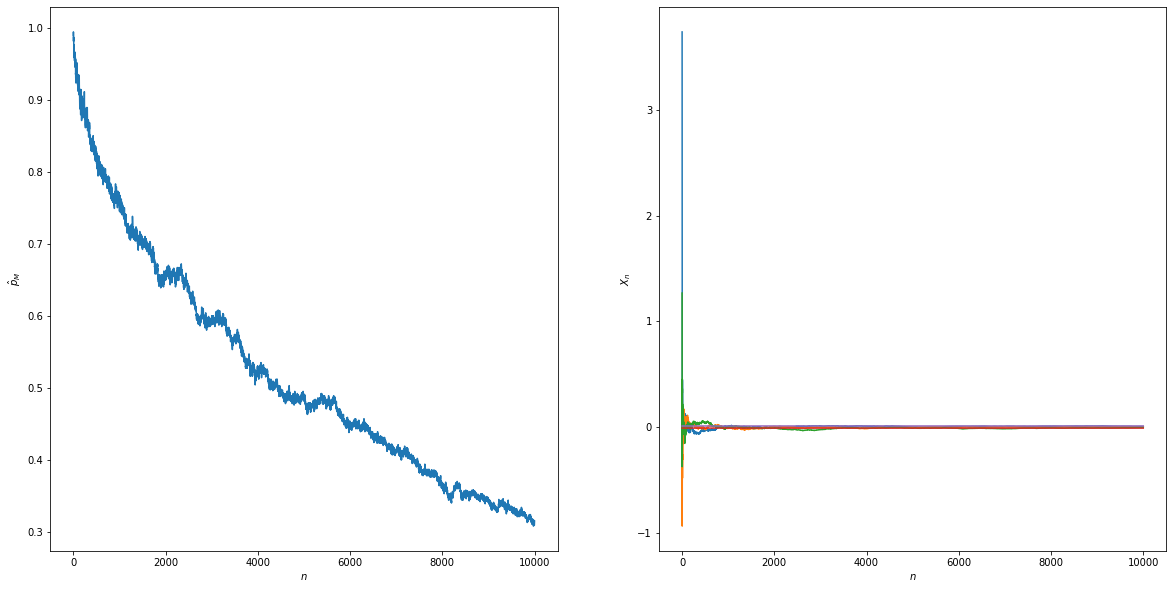

In [4]:
illustration_conv_prob()

The estimation of the probability that $X_n$ (i.e the empirical mean of iid standard normal variables here) deviates from $X$ (i.e $0$ here) goes to $0$ as $n$ goes to $\infty$.

For a given $n$, the number of realisations represented by $M$ influences the preciseness of the estimor $\hat{p}_M$: the higher $M$ is, the more precise the estimation is.

The two interpretations of convergence in probability:
$$
\text{The probability that $X_n$ deviates from $X$ of at least $\epsilon > 0$ goes to $0$ as $n$ goes to $\infty$ }
$$

$$
\text{When $n$ is large enough, it becomes globally less frequent that $X_n$ deviates from $X$ of at least $\epsilon > 0$  }
$$

# Convergence almost sure

$X_n \xrightarrow{\mathbb{a.s}} X$ $\iff$ $\forall$ $\epsilon > 0$,  $\mathbb{P}(\exists k\geq n , |X_k - X|>\epsilon) = a_n$  goes to $0$ as $n$ goes to $\infty$ 

We have: $\hat{a}_M = \frac{1}{M} \sum_{j=1}^M I(\exists k\geq n, |X_k^{j} - X^{j}| >\epsilon)\xrightarrow{\mathbb{P}} a_n$, where $X_n^{j} - X^{j}$ are iid and with same law as  $X_n - X$, hence  $\hat{a}_M$ is an unbiased (since $\mathbb{E}(\hat{a}_M) = a_n$) and weakly consistent estimator of $a_n$

We are going to illustrate this when $X$ is deterministic, by seing that $\hat{a}_M$ goes to $0$ as $n$ goes to $\infty$ (almost surely)

In [5]:
def illustration_conv_a_s(eps = 10**(-2), n_max = 10000, M = 1000):
    ''' Illustrates the convergence in probability to 0 of the empirical mean of iid standard normal 
     random variables,
     
    eps is the precision, n_max is the numer of observations, M the numer of samples 
    '''
    ## The matrix of the realisations of iid standard normal random variables  
    mat_realisations = np.random.normal(0, 1, (n_max, M))
    
    ## The matrix of mean realisations(the X_n)
    X_n = np.diag( 1  / np.array(list(range(1,n_max+1))) ) @ mat_realisations.cumsum(0)
    
    ## The estimation p_hat of the probability that the empirical mean deviates from 0 of at least epsilon (eps here)
    pre_p_hat = (abs(X_n) > eps)*1
    
    #print(pre_p_hat.shape)
    
    
    # This matrix will help build the estimate a_hat
    ones = 1 + np.zeros((n_max, M))
    
    ## We get the columns in pre_p_hat containing 0's and the positions of the 0's 
    l1, l2 = np.where(pre_p_hat==0)
    l2, l1 = zip(*sorted(zip(l2,l1)))
    l1, l2 = list(l1), list(l2)
    
    # For convenience 
    m = pd.DataFrame(np.c_[[l1, l2]].T, columns = ["row", "col"])
    
    # keys: postition of columns containing the 0's, values: positions of the 0's in the column
    # Each value of dic is an integer
    dic = {i: list(m[m["col"]==i]["row"]) for i in list(m["col"].unique())}
    
    def getRelevantColumns(dico, N_max):
        '''
        This procedure finds the columns of pre_p_hat which have a sequence of consecutive zeros at the their "bottom".
        (e.g (1,0,0,1,0,...,0)') and gets the positions of the first and last 0's of this sequence.
        n_max is the number of rows of the matrix pre_p_hat
        '''

        list_irrelevant_col = [] #list of irrelevant columns in the sense that 0 is not their last element (at their 'bottom')
        
        for key in dico.keys():
            value = dico[key];
            begin = value[-1];
            j = -1;
            if begin == N_max-1:
                #print(begin)
                # Then the column whose number is key is relevant
                while j<=len(value) and value[j-1]== value[j]-1:
                    j-=1;
                end = value[j];
                dico[key] = list(range(end, N_max))
            else:
                list_irrelevant_col.append(key)
        for key in list_irrelevant_col:
            del dico[key]
    
    getRelevantColumns(dic, n_max);
    
    position_zeros = np.array([[value, key] for key in dic.keys() for value in dic[key]]);
    # Now we have the relevant columns (columns for which the last element(s) is(are) zero(s)) of pre_p_hat
    # Lets us construct 
    ones[position_zeros[:,0], position_zeros[:,1]] = 0
  
    a_hat = ones.sum(1) / M

    #print(p_hat.shape)
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].plot(list(range(1, n_max + 1)), a_hat)
    ax[0].set_xlabel("$n$")
    ax[0].set_ylabel("$\hat{a}_M$")
    
    ## We take the last
    ax[1].plot(list(range(1, n_max+1)), X_n[:,0])
    
    
    ax[1].plot(list(range(1, n_max+1)), [-eps]*n_max)
    ax[1].plot(list(range(1, n_max+1)), [eps]*n_max)
    ax[1].set_xlabel("$n$")
    ax[1].set_ylabel("$X_n$")
    
    plt.show()

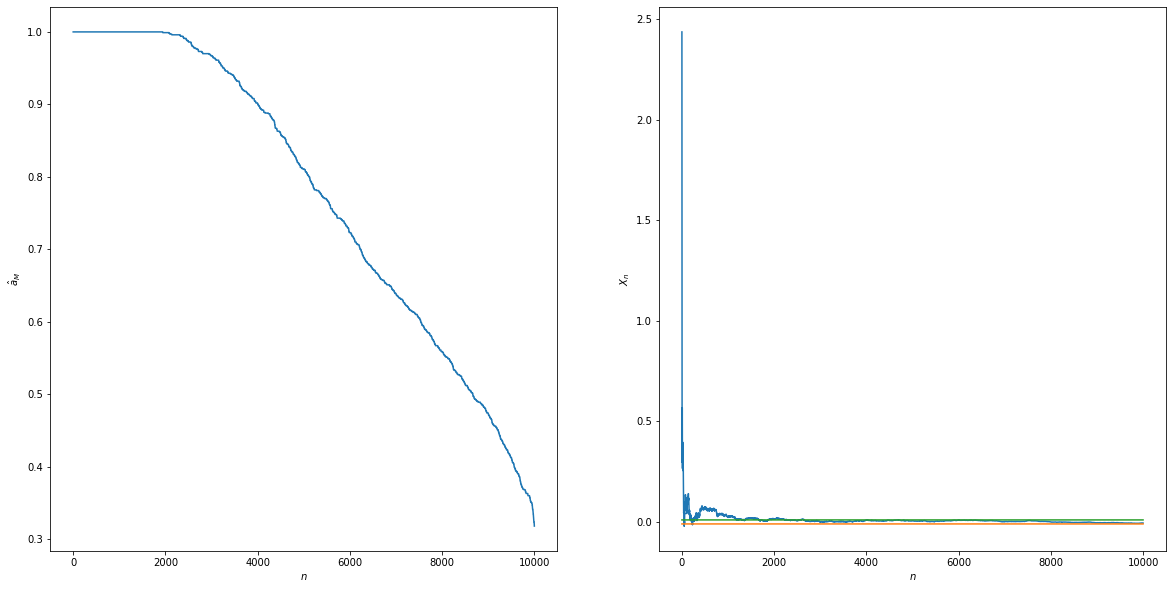

In [6]:
illustration_conv_a_s(eps = 10**(-2), n_max = 10000, M = 1000)

# Difference between convergence  almost sure and convergence in probability with an example

Let $X_n$ be a random variable with the following distribution:

$$\mathbb{P}(X_n = n^{1/r}) = \frac{1}{n} \text{ , } \mathbb{P}(X_n=0) = 1-\frac{1}{n}$$

where $r>0$

$(X_n)$ converges to 0 as $n$ goes to $\infty$ in probability. In fact, $\forall$ $\epsilon>0$, $\mathbb{P}(|X_n|>\epsilon) = 1/n$ goes to 0 as $n$ goes to $\infty$

In [53]:
def simulate_X(n=1000, r = 2):
    arr = np.array([[u,pos+1] for pos, u in enumerate(np.random.uniform(0, 1, n))])
    return np.apply_along_axis(lambda x: (x[0]<1-1/x[1])*0 + (x[0]>1-1/x[1])*x[1]**(1/2), 1, arr)

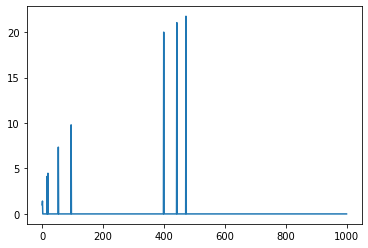

In [55]:
plt.plot(range(1000), simulate_X())